In [1]:
import numpy as np

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# %cd gdrive/MyDrive/Colab Notebooks/colab_upload

In [3]:
# My modules

from tokenizer_helpers import load_tokenizer
from model_components import Transformer
from translate_helper_functions import random_translate_from_tensor, plot_attention_weights, translate

In [4]:
# load BPE tokenizers with pre-trained weights
de_tokenizer, de_word_index = load_tokenizer('tokenizers/tokenizer_de_corpus.json')
en_tokenizer, en_word_index = load_tokenizer('tokenizers/tokenizer_en_corpus.json')

In [5]:
vocab_len_source = len(de_word_index.keys())
vocab_len_target = len(en_word_index.keys())
print (vocab_len_source, vocab_len_target)

29999 29999


In [6]:
num_tokens_source = vocab_len_source + 1
num_tokens_target = vocab_len_target + 1
print (num_tokens_source, num_tokens_target)

30000 30000


In [7]:
# load source & train arrays from csv file:
source_train_tensor = np.loadtxt('tensors/source_train_tensor.csv', delimiter = ',', dtype = 'int32')
source_test_tensor = np.loadtxt('tensors/source_test_tensor.csv', delimiter = ',', dtype = 'int32')
target_train_tensor = np.loadtxt('tensors/target_train_tensor.csv', delimiter = ',', dtype = 'int32')
target_test_tensor = np.loadtxt('tensors/target_test_tensor.csv', delimiter = ',', dtype = 'int32')

In [8]:
max_source_length= max(len(t) for t in np.concatenate((source_train_tensor, source_test_tensor), axis=0))
max_target_length= max(len(t) for t in np.concatenate((target_train_tensor, target_test_tensor), axis=0))

In [9]:
max_source_length, max_target_length

(49, 47)

<h3> Define arguments for Transformer </h3>

- These needs to be same as the ones used during training

In [10]:
# Transformer arguments: 
# num_layers, embedding_dim, num_heads, fully_connected_dim, input_vocab_size, 
# target_vocab_size, max_positional_encoding_input,
# max_positional_encoding_target, dropout_rate=0.1, layernorm_eps=1e-6

num_layers = 4
embedding_dim = 64
num_heads = 5
fully_connected_dim = 128
input_vocab_size = num_tokens_source
target_vocab_size = num_tokens_target
max_positional_encoding_input = max_source_length
max_positional_encoding_target = max_target_length

- Create transformer object before loading saved weights

In [11]:
transformer = Transformer(
    num_layers=num_layers,
    embedding_dim=embedding_dim,
    num_heads=num_heads,
    fully_connected_dim=fully_connected_dim,
    input_vocab_size=input_vocab_size,
    target_vocab_size=target_vocab_size,
    max_positional_encoding_input = max_positional_encoding_input,
    max_positional_encoding_target = max_positional_encoding_target
    )

file_path = 'saved_models/model'
transformer.load_weights(file_path)

In [13]:
pred_sentence, original_sentence, attention_weights = random_translate_from_tensor(transformer, de_tokenizer, en_tokenizer, 
                                                                                        source_train_tensor, target_train_tensor, max_target_length)

Input: Waren Sie schon einmal so richtig verliebt?
Predicted translation: Were they do you do well.
Actual translation: Have you ever really been in love?


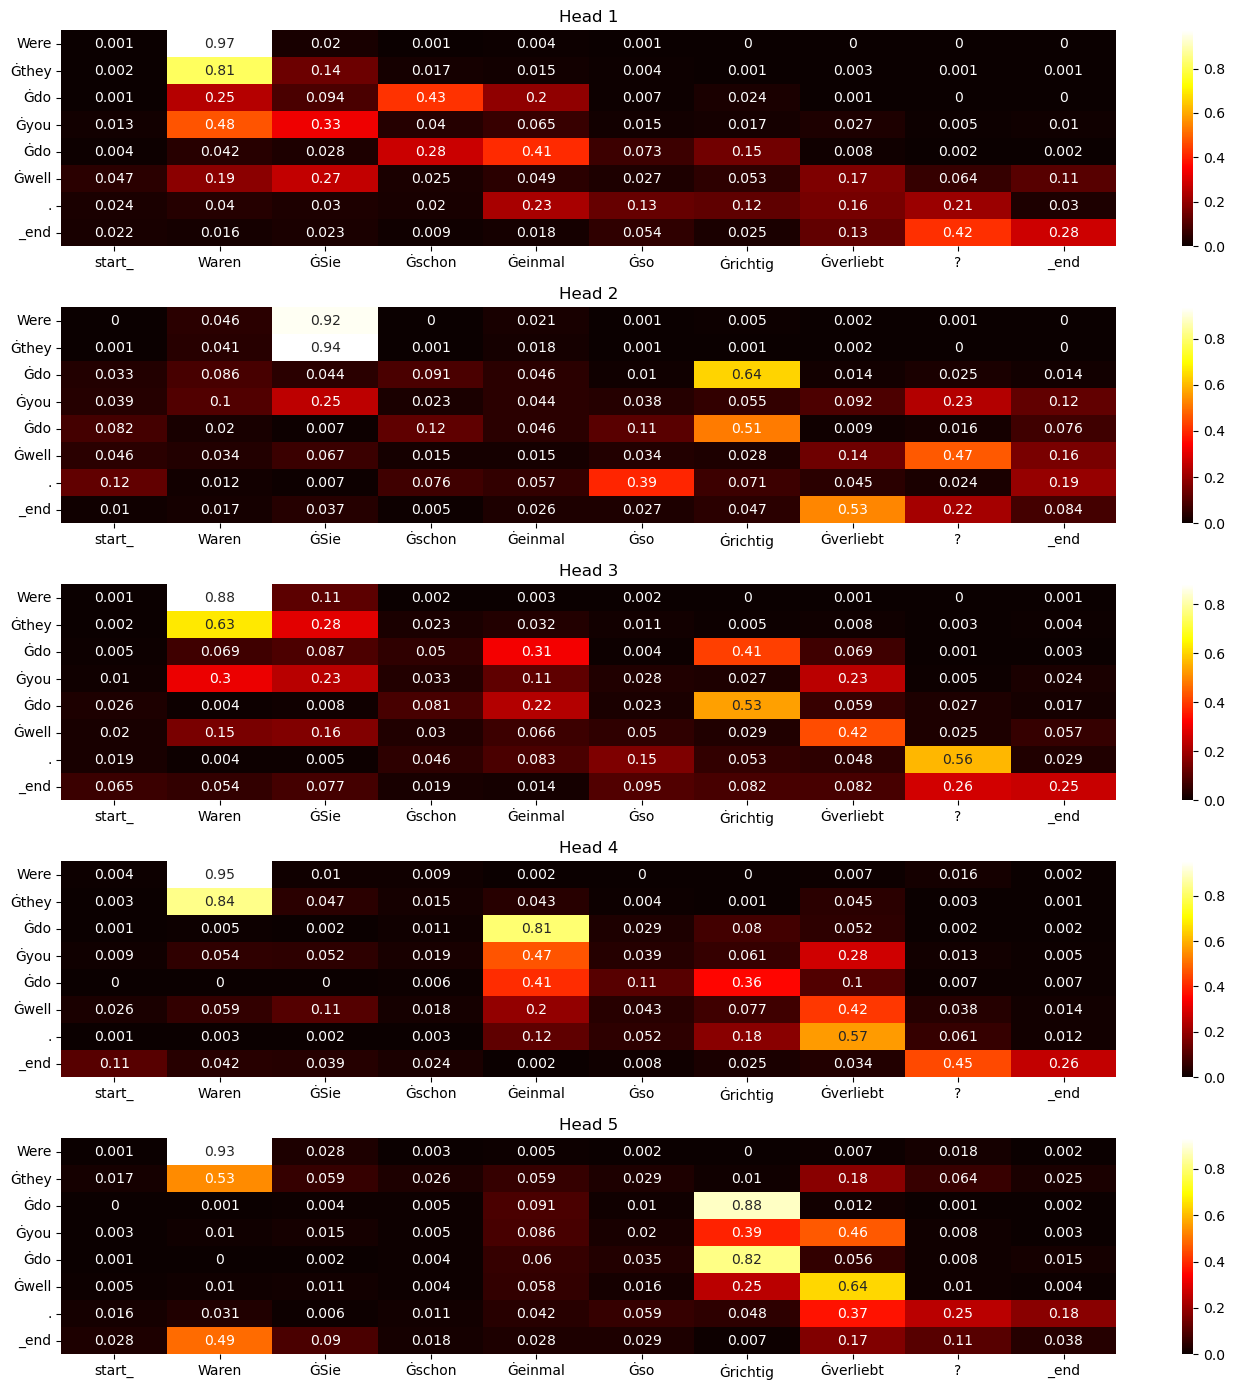

In [14]:
plot_attention_weights(pred_sentence, original_sentence, attention_weights, de_tokenizer, en_tokenizer)

In [15]:
sent_1 = 'Tom muss nach Hause gehen'
pred_sentence, original_sentence, attention_weights = translate(sent_1, transformer, max_target_length, de_tokenizer, en_tokenizer)
pred_sentence, original_sentence

('Tom must go home.', 'Tom muss nach Hause gehen')

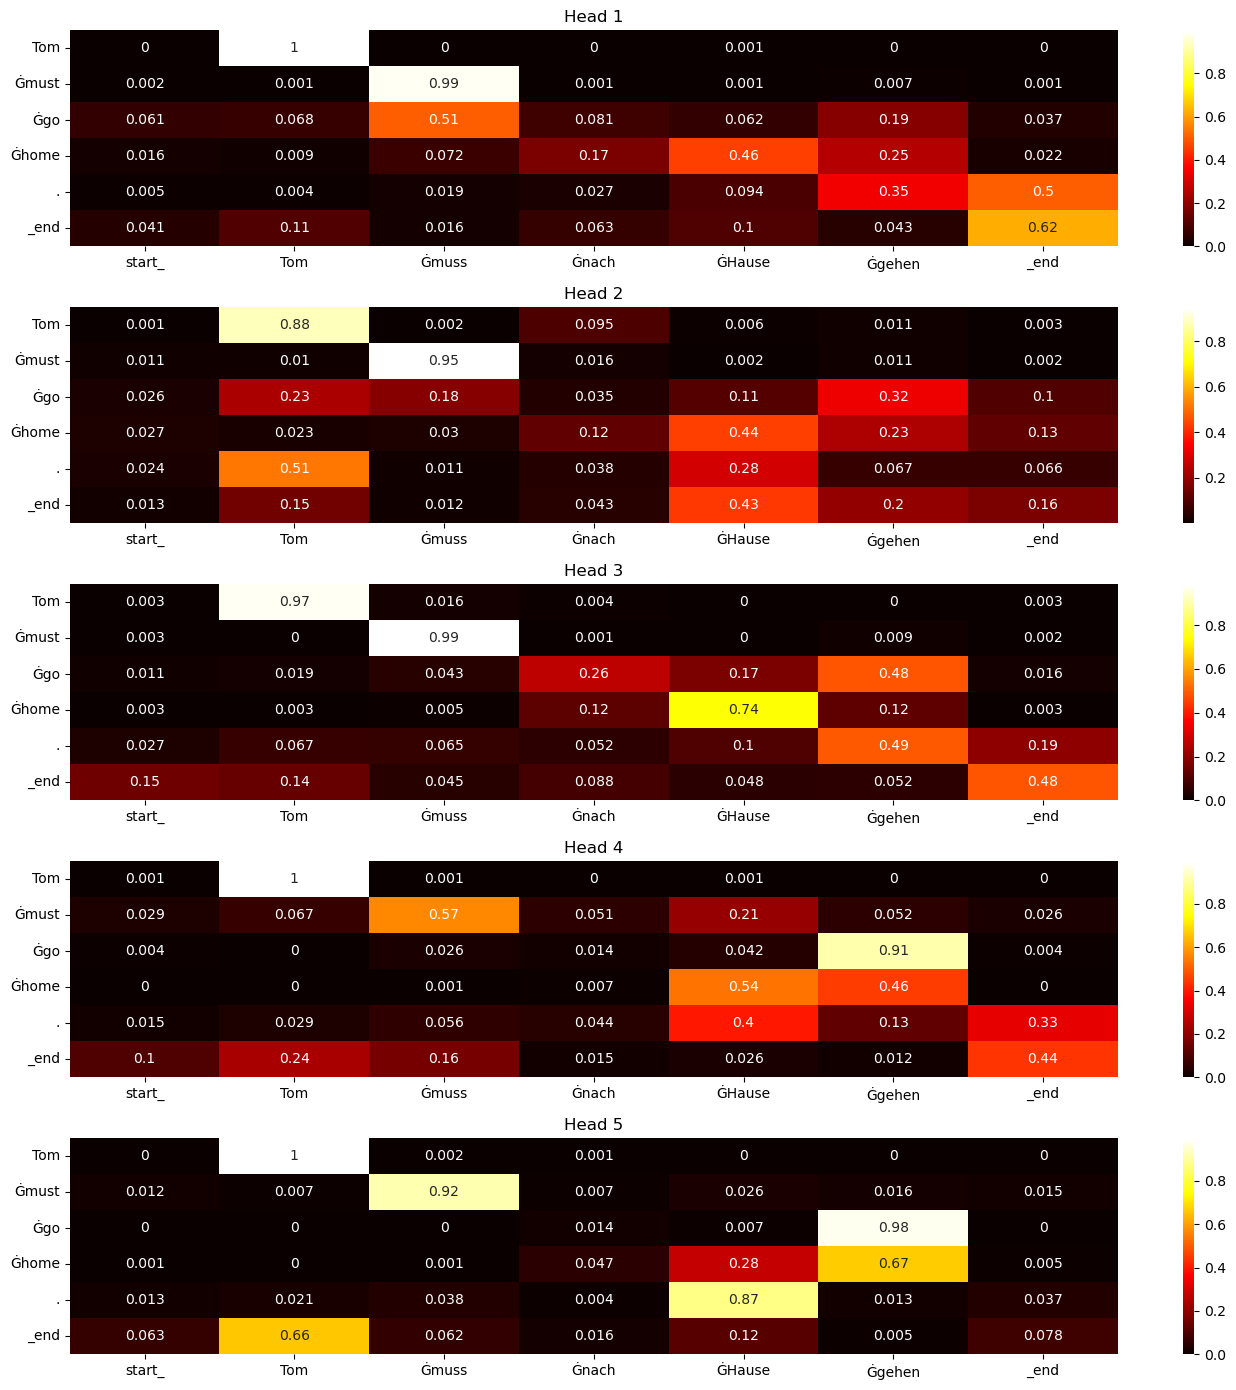

In [16]:
plot_attention_weights(pred_sentence, original_sentence, attention_weights, de_tokenizer, en_tokenizer)